In [1]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [12]:
# fill age,embarked and embark_town with zero
df["age"].fillna(0, inplace=True)

df["embarked"].fillna(0, inplace=True)
df["embark_town"].fillna(0, inplace=True)
df.isnull().sum().sort_values(ascending = False)


deck           688
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

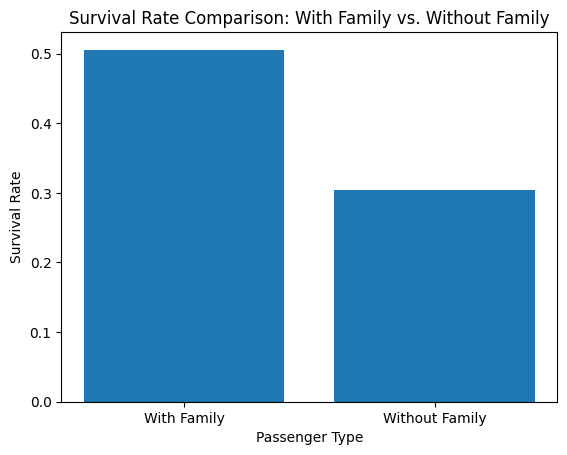

In [19]:
df['FamilySize'] = df['parch'] + df['sibsp']
# servival and non servival rate
family_survival_rate = df[df['FamilySize'] > 0]['survived'].mean()
no_family_survival_rate = df[df['FamilySize'] == 0]['survived'].mean()
# by bar chart servival rate
plt.bar(['With Family', 'Without Family'], [family_survival_rate, no_family_survival_rate])
plt.xlabel('Passenger Type')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Comparison: With Family vs. Without Family')
plt.show()

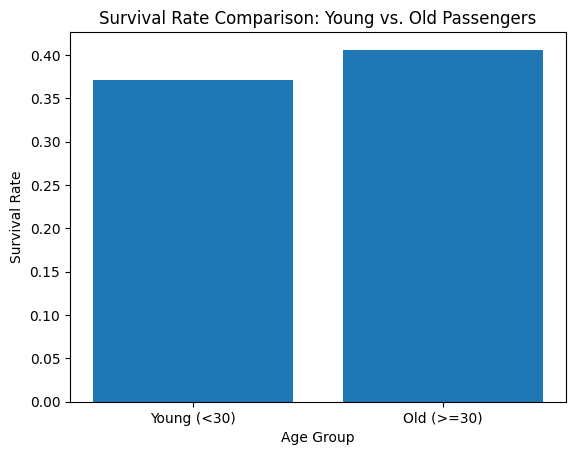

In [20]:


# Step 1: Define your age threshold (e.g., 30 years) for categorizing passengers
age_threshold = 30

# Step 2: Calculate survival rates for young and old passengers
young_survival_rate = df[df['age'] < age_threshold]['survived'].mean()
old_survival_rate = df[df['age'] >= age_threshold]['survived'].mean()

# Step 3: Create a bar chart to visualize and compare the survival rates
plt.bar(['Young (<30)', 'Old (>=30)'], [young_survival_rate, old_survival_rate])
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.title('Survival Rate Comparison: Young vs. Old Passengers')
plt.show()


In [21]:
# under 18 servival rate
age_threshold_for_children = 18
children_df = df[df['age'] < age_threshold_for_children]
survival_rate_for_children = children_df['survived'].mean()
survival_rate_for_children

0.3896551724137931

<function matplotlib.pyplot.show(close=None, block=None)>

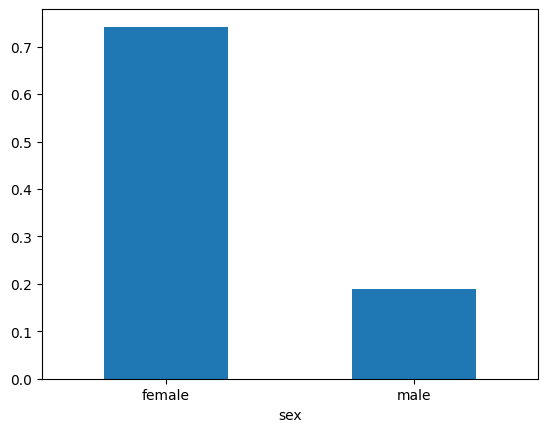

In [26]:
# female vs male servial rate
survival_rate_by_gender = df.groupby('sex')['survived'].mean()
survival_rate_by_gender.plot(kind='bar', rot=0)
plt.show